# Preparación de los datos

In [ ]:
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

df = pd.read_json(url)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


## Normalización

Ya que tenemos 4 columnas a normalizar, se procedera a hacer algunos ajustes a los datos a excepción de columnas que tengan valores como **Yes** o **No**.

In [ ]:
def ver_valores(data):
  for i in data.columns:
    print(f'{i}: ', data[i].unique())

### Para customer

In [ ]:
df_customer = pd.json_normalize(df['customer'])
ver_valores(df_customer)

gender:  ['Female' 'Male']
SeniorCitizen:  [0 1]
Partner:  ['Yes' 'No']
Dependents:  ['Yes' 'No']
tenure:  [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]


In [ ]:
# Solo se van a binarizar la columna gender, {Female : 0 , Male:1}
df_customer['gender'] = df_customer['gender'].replace({'Female':0 , 'Male':1})
df_customer.head(2)

/tmp/ipython-input-951105855.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_customer['gender'] = df_customer['gender'].replace({'Female':0 , 'Male':1})


,gender,SeniorCitizen,Partner,Dependents,tenure
0,0,0,Yes,Yes,9
1,1,0,No,No,9


In [ ]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         7267 non-null   int64 
 1   SeniorCitizen  7267 non-null   int64 
 2   Partner        7267 non-null   object
 3   Dependents     7267 non-null   object
 4   tenure         7267 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 284.0+ KB


### Para phone

In [ ]:
df_phone = pd.json_normalize(df['phone'])
ver_valores(df_phone)

PhoneService:  ['Yes' 'No']
MultipleLines:  ['No' 'Yes' 'No phone service']


In [ ]:
# Respetando excepción
df_phone['MultipleLines'] = df_phone['MultipleLines'].replace({'No phone service': 'No'})
ver_valores(df_phone)

PhoneService:  ['Yes' 'No']
MultipleLines:  ['No' 'Yes']


In [ ]:
df_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   PhoneService   7267 non-null   object
 1   MultipleLines  7267 non-null   object
dtypes: object(2)
memory usage: 113.7+ KB


### Para internet

In [ ]:
df_internet = pd.json_normalize(df['internet'])
ver_valores(df_internet)

InternetService:  ['DSL' 'Fiber optic' 'No']
OnlineSecurity:  ['No' 'Yes' 'No internet service']
OnlineBackup:  ['Yes' 'No' 'No internet service']
DeviceProtection:  ['No' 'Yes' 'No internet service']
TechSupport:  ['Yes' 'No' 'No internet service']
StreamingTV:  ['Yes' 'No' 'No internet service']
StreamingMovies:  ['No' 'Yes' 'No internet service']


In [ ]:
df_internet = df_internet.replace({'DSL': 'Yes', 'Fiber optic': 'Yes', 'No internet service': 'No'})
ver_valores(df_internet)

InternetService:  ['Yes' 'No']
OnlineSecurity:  ['No' 'Yes']
OnlineBackup:  ['Yes' 'No']
DeviceProtection:  ['No' 'Yes']
TechSupport:  ['Yes' 'No']
StreamingTV:  ['Yes' 'No']
StreamingMovies:  ['No' 'Yes']


In [ ]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   InternetService   7267 non-null   object
 1   OnlineSecurity    7267 non-null   object
 2   OnlineBackup      7267 non-null   object
 3   DeviceProtection  7267 non-null   object
 4   TechSupport       7267 non-null   object
 5   StreamingTV       7267 non-null   object
 6   StreamingMovies   7267 non-null   object
dtypes: object(7)
memory usage: 397.5+ KB


### Para account

In [ ]:
df_account = pd.json_normalize(df['account'], sep='_')
ver_valores(df_account)

Contract:  ['One year' 'Month-to-month' 'Two year']
PaperlessBilling:  ['Yes' 'No']
PaymentMethod:  ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
Charges_Monthly:  [65.6  59.9  73.9  ... 91.75 68.8  67.85]
Charges_Total:  ['593.3' '542.4' '280.85' ... '742.9' '4627.65' '3707.6']


In [ ]:
# Variable categorica ordinal: ('One year') = 1 , ('Month-to-month') = 0 , ('Two year') = 2
df_account['Contract'] = df_account['Contract'].replace({'Month-to-month':0, 'One year': 1, 'Two year': 2})
# variable categorica nominal: ('Mailed check' 'Electronic check') = 0 , ('Credit card (automatic)' 'Bank transfer (automatic)') = 1
df_account['PaymentMethod'] = df_account['PaymentMethod'].replace({'Mailed check': 0, 'Electronic check': 0, 'Credit card (automatic)': 1 , 'Bank transfer (automatic)': 1})
ver_valores(df_account)

Contract:  [1 0 2]
PaperlessBilling:  ['Yes' 'No']
PaymentMethod:  [0 1]
Charges_Monthly:  [65.6  59.9  73.9  ... 91.75 68.8  67.85]
Charges_Total:  ['593.3' '542.4' '280.85' ... '742.9' '4627.65' '3707.6']


/tmp/ipython-input-2943236935.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_account['Contract'] = df_account['Contract'].replace({'Month-to-month':0, 'One year': 1, 'Two year': 2})
/tmp/ipython-input-2943236935.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_account['PaymentMethod'] = df_account['PaymentMethod'].replace({'Mailed check': 0, 'Electronic check': 0, 'Credit card (automatic)': 1 , 'Bank transfer (automatic)': 1})


In [ ]:
df_account.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Contract          7267 non-null   int64  
 1   PaperlessBilling  7267 non-null   object 
 2   PaymentMethod     7267 non-null   int64  
 3   Charges_Monthly   7267 non-null   float64
 4   Charges_Total     7267 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 284.0+ KB


### Unimos todo

In [ ]:
df = pd.concat([df[['customerID', 'Churn']], df_customer, df_phone, df_internet, df_account], axis=1)
df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
0,0002-ORFBO,No,0,0,Yes,Yes,9,Yes,No,Yes,...,Yes,No,Yes,Yes,No,1,Yes,0,65.60,593.3
1,0003-MKNFE,No,1,0,No,No,9,Yes,Yes,Yes,...,No,No,No,No,Yes,0,No,0,59.90,542.4
2,0004-TLHLJ,Yes,1,0,No,No,4,Yes,No,Yes,...,No,Yes,No,No,No,0,Yes,0,73.90,280.85
3,0011-IGKFF,Yes,1,1,Yes,No,13,Yes,No,Yes,...,Yes,Yes,No,Yes,Yes,0,Yes,0,98.00,1237.85
4,0013-EXCHZ,Yes,0,1,Yes,No,3,Yes,No,Yes,...,No,No,Yes,Yes,No,0,Yes,0,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,0,0,No,No,13,Yes,No,Yes,...,No,No,Yes,No,No,1,No,0,55.15,742.9
7263,9992-RRAMN,Yes,1,0,Yes,No,22,Yes,Yes,Yes,...,No,No,No,No,Yes,0,Yes,0,85.10,1873.7
7264,9992-UJOEL,No,1,0,No,No,2,Yes,No,Yes,...,Yes,No,No,No,No,0,Yes,0,50.30,92.75
7265,9993-LHIEB,No,1,0,Yes,Yes,67,Yes,No,Yes,...,No,Yes,Yes,No,Yes,2,No,0,67.85,4627.65


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   int64  
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   int64  


## Revisión por valores unicos

In [ ]:
ver_valores(df)

customerID:  ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn:  ['No' 'Yes' '']
gender:  [0 1]
SeniorCitizen:  [0 1]
Partner:  ['Yes' 'No']
Dependents:  ['Yes' 'No']
tenure:  [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
PhoneService:  ['Yes' 'No']
MultipleLines:  ['No' 'Yes']
InternetService:  ['Yes' 'No']
OnlineSecurity:  ['No' 'Yes']
OnlineBackup:  ['Yes' 'No']
DeviceProtection:  ['No' 'Yes']
TechSupport:  ['Yes' 'No']
StreamingTV:  ['Yes' 'No']
StreamingMovies:  ['No' 'Yes']
Contract:  [1 0 2]
PaperlessBilling:  ['Yes' 'No']
PaymentMethod:  [0 1]
Charges_Monthly:  [65.6  59.9  73.9  ... 91.75 68.8  67.85]
Charges_Total:  ['593.3' '542.4' '280.85' ... '742.9' '4627.65' '3707.6']


In [ ]:
(df['customerID'].str.strip() == '').value_counts()

,count
customerID,
False,7267


In [ ]:
(df['Charges_Monthly'] == '').value_counts()

,count
Charges_Monthly,
False,7267


In [ ]:
(df['Charges_Total'].str.strip() == '').value_counts()

,count
Charges_Total,
False,7256
True,11


In [ ]:
df['Churn'] = df['Churn'].replace('', np.nan)
df.Churn.isna().sum()

np.int64(224)

In [ ]:
df['Charges_Total'] = df['Charges_Total'].str.strip().replace({'':np.nan})
df.Charges_Total.isna().sum()

np.int64(11)

In [ ]:
df[df.isna().any(axis=1)]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
30,0047-ZHDTW,NaN,0,0,No,No,11,Yes,Yes,Yes,...,No,No,No,No,No,0,Yes,1,79.00,929.3
75,0120-YZLQA,NaN,1,0,No,No,71,Yes,No,No,...,No,No,No,No,No,2,Yes,1,19.90,1355.1
96,0154-QYHJU,NaN,1,0,No,No,29,Yes,No,Yes,...,Yes,No,Yes,No,No,1,Yes,0,58.75,1696.2
98,0162-RZGMZ,NaN,0,1,No,No,5,Yes,No,Yes,...,Yes,No,Yes,No,No,0,No,1,59.90,287.85
175,0274-VVQOQ,NaN,1,1,Yes,No,65,Yes,Yes,Yes,...,Yes,Yes,No,Yes,Yes,1,Yes,1,103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,NaN,0,0,No,No,14,Yes,Yes,Yes,...,Yes,No,No,No,No,1,Yes,0,54.25,773.2
7180,9872-RZQQB,NaN,0,0,Yes,No,49,No,No,Yes,...,No,No,No,Yes,No,0,No,1,40.65,2070.75
7211,9920-GNDMB,NaN,1,0,No,No,9,Yes,Yes,Yes,...,No,No,No,No,No,0,Yes,0,76.25,684.85
7239,9955-RVWSC,NaN,0,0,Yes,Yes,67,Yes,No,No,...,No,No,No,No,No,2,Yes,1,19.25,1372.9


### Tratamiento de nulos

In [ ]:
df = df.map(lambda x: x.strip() if isinstance(x, str) else x).replace({'': np.nan})
df.dropna(inplace=True)

### Nueva columna **Charges_Daily**

In [ ]:
# Se esta usando 30 por los meses comerciales (contabilidad)
df['Charges_Daily'] = (df['Charges_Monthly'] / 30).round(2)
df['Charges_Daily'].head()

,Charges_Daily
0,2.19
1,2.00
2,2.46
3,3.27
4,2.80


## Transformación

In [ ]:
def binarizacion(data, columna):
  return data[columna].replace({'No':0, 'Yes':1})

In [ ]:
# Practicamente Encoding
for col in ['Churn', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']:
  df[col] = binarizacion(df,col)

# Se convierte Charges_Total a tipo float64
df['Charges_Total']= df['Charges_Total'].astype(np.float64)
df.info()

/tmp/ipython-input-2681183824.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return data[columna].replace({'No':0, 'Yes':1})


<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   int64  
 2   gender            7032 non-null   int64  
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   int64  
 5   Dependents        7032 non-null   int64  
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   int64  
 8   MultipleLines     7032 non-null   int64  
 9   InternetService   7032 non-null   int64  
 10  OnlineSecurity    7032 non-null   int64  
 11  OnlineBackup      7032 non-null   int64  
 12  DeviceProtection  7032 non-null   int64  
 13  TechSupport       7032 non-null   int64  
 14  StreamingTV       7032 non-null   int64  
 15  StreamingMovies   7032 non-null   int64  
 16  Contract          7032 non-null   int64  
 17  

# Preparación para los modelos ML

Se procede a seleccionar nuestras variables **X (Features)** y **Y (Objetivo)**.

```
customerID: número de identificación único de cada cliente
Churn: si el cliente dejó o no la empresa
gender: género (masculino y femenino)
SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
Partner: si el cliente tiene o no una pareja
Dependents: si el cliente tiene o no dependientes
tenure: meses de contrato del cliente
PhoneService: suscripción al servicio telefónico
MultipleLines: suscripción a más de una línea telefónica
InternetService: suscripción a un proveedor de internet
OnlineSecurity: suscripción adicional de seguridad en línea
OnlineBackup: suscripción adicional de respaldo en línea
DeviceProtection: suscripción adicional de protección del dispositivo
TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera
StreamingTV: suscripción de televisión por cable
StreamingMovies: suscripción de streaming de películas
Contract: tipo de contrato
PaperlessBilling: si el cliente prefiere recibir la factura en línea
PaymentMethod: forma de pago
Charges_Monthly: total de todos los servicios del cliente por mes
Charges_Total: total gastado por el cliente
Charges_Daily: total de todos los servicios del cliente por dia
```

In [ ]:
df.drop(columns='customerID', inplace=True)

In [ ]:
# Definimos las variables independientes (X) y la variable dependiente (y)
# Features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'InternetService', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges_Total']
# Objetivo = ['Churn']
print(df.shape)
df.head(2)

(7032, 21)


,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,Charges_Daily
0,0,0,0,1,1,9,1,0,1,0,...,0,1,1,0,1,1,0,65.6,593.3,2.19
1,0,1,0,0,0,9,1,1,1,0,...,0,0,0,1,0,0,0,59.9,542.4,2.00


## Proporción de Churn

In [ ]:
# Verificación de la proporción de Churn
df.Churn.value_counts(normalize=True)*100

,proportion
Churn,
0,73.421502
1,26.578498


> Se evidencia un pequeño desbalance de nuestras clases.

In [ ]:
correlacion = df.corr()

cor_with_churn = correlacion['Churn'].sort_values(ascending=False)
print('Correlación con la variable Churn:\n')
print(cor_with_churn)

Correlación con la variable Churn:

Churn               1.000000
InternetService     0.227578
Charges_Daily       0.192914
Charges_Monthly     0.192858
PaperlessBilling    0.191454
SeniorCitizen       0.150541
StreamingTV         0.063254
StreamingMovies     0.060860
MultipleLines       0.040033
PhoneService        0.011691
gender             -0.008545
DeviceProtection   -0.066193
OnlineBackup       -0.082307
Partner            -0.149982
Dependents         -0.163128
TechSupport        -0.164716
OnlineSecurity     -0.171270
Charges_Total      -0.199484
PaymentMethod      -0.210420
tenure             -0.354049
Contract           -0.396150
Name: Churn, dtype: float64


In [ ]:
import plotly.express as px
px.box(df, x='Churn', y='tenure')

In [ ]:
px.box(df, x='Churn', y='Charges_Total')

## Separando datos de entrenamiento y prueba

In [ ]:
# Separación de X y y
X = df.drop(columns='Churn')
y = df['Churn']

In [ ]:
# Dividir entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, stratify=y, random_state=42)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
def resumen(y_test, y_pred):
  print(f"Precision     : {precision_score(y_test, y_pred):.2f}")
  print(f"Recall        : {recall_score(y_test, y_pred):.2f}")
  print(f"F1-Score      : {f1_score(y_test, y_pred):.2f}")
  print(f"Roc-auc       : {roc_auc_score(y_test, y_pred):.2f}")

# Entrenamiento del modelo

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

negative = sum(y_train == 0)
positive = sum(y_train == 1)
scale_pos_weight = negative/positive

param_grid= {
    'learning_rate': [0.1],
    'max_depth': [5, 10],
    'subsample': [0.3, 0.5, 1],
    'n_estimators': [100],
    'scale_pos_weight': [1, scale_pos_weight],
    'min_child_weight': [1, 3, 5, 10],
    'reg_lambda': [1]
}

model = XGBClassifier()

grid = GridSearchCV(model, param_grid=param_grid, scoring='recall', cv=5,return_train_score=True)
grid.fit(X_train, y_train)



GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.1], 'max_depth': [5, 10],
                         'min_child_weight': [1, 3, 5, 10],
                         'n_estimators': [100], 'reg_lambda': [1],
                         'scale_pos_weight': [1, 2.761768901569187],
                         'subsample': [0.3, 0.5, 1]},
             return_train_score=True, scoring='recall')

## Optimización de hiperparámetros

In [ ]:
grid.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 3,
 'n_estimators': 100,
 'reg_lambda': 1,
 'scale_pos_weight': 2.761768901569187,
 'subsample': 1}

In [ ]:
best_model = grid.best_estimator_

## Comprendiendo los feature_importances_

In [ ]:
f1 = pd.DataFrame({'Features': X.columns, 'Valores': (best_model.feature_importances_*100)}).sort_values(by='Valores', ascending=False)
f1

,Features,Valores
14,Contract,48.625984
7,InternetService,6.444026
19,Charges_Daily,5.059041
4,tenure,3.745389
12,StreamingTV,3.470945
15,PaperlessBilling,3.427088
11,TechSupport,3.026402
13,StreamingMovies,2.776704
5,PhoneService,2.513214
17,Charges_Monthly,2.377419


## Modelo + Validación cruzada

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

scoring = ['precision', 'recall', 'f1', 'roc_auc']
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_resultados = cross_validate(best_model, X_train, y_train, cv=skf, scoring=scoring, return_train_score=True)

pd.DataFrame(cv_resultados).mean().round(2)

,0
fit_time,0.11
score_time,0.03
test_precision,0.54
train_precision,0.62
test_recall,0.76
train_recall,0.90
test_f1,0.63
train_f1,0.74
test_roc_auc,0.84
train_roc_auc,0.93


## Evaluación final

              precision    recall  f1-score   support

           0       0.90      0.76      0.82      1291
           1       0.53      0.77      0.63       467

    accuracy                           0.76      1758
   macro avg       0.72      0.76      0.72      1758
weighted avg       0.80      0.76      0.77      1758

Precision     : 0.53
Recall        : 0.77
F1-Score      : 0.63
Roc-auc       : 0.76


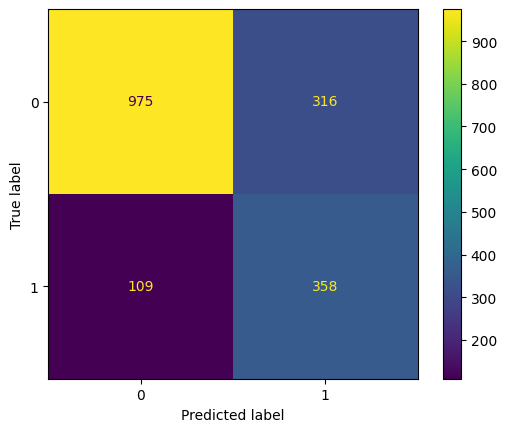

In [ ]:
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
resumen(y_test, y_pred)

## Resumen

In [ ]:
import matplotlib.pyplot as plt
def visualizacion(data, model_num):
  fig, ax = plt.subplots()
  ax.barh(data['Features'], data['Valores'])
  ax.invert_yaxis()
  plt.title(f'Feature_importances del modelo N°{model_num}')
  plt.tight_layout()
  plt.show()


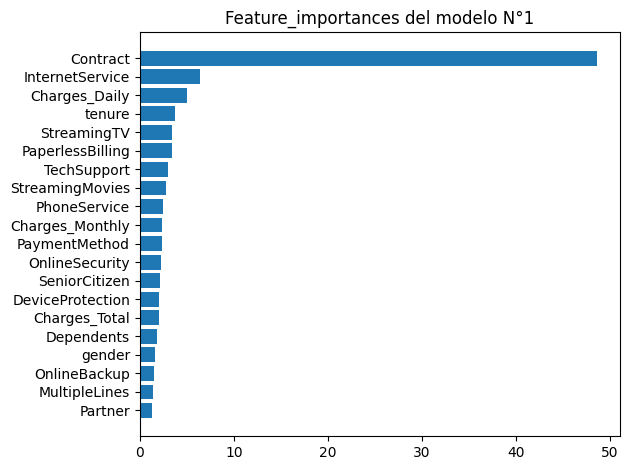

In [ ]:
visualizacion(f1, 1)

# Entrenamiento de modelos con Oversampling

## XGB con oversampling

In [ ]:
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42, shuffle=True, stratify=y)

sm= SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train,y_train)

In [ ]:
modelo = XGBClassifier()

param_grid= {
    'learning_rate': [0.1],
    'max_depth': [5, 10],
    'subsample': [1],
    'n_estimators': [100],
    'min_child_weight': [0.8, 1, 1.2]
}

grid = GridSearchCV(modelo, param_grid=param_grid, scoring='recall',cv=5)
grid.fit(X_train_res, y_train_res)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.1], 'max_depth': [5, 10],
                         'min_child_weight': [0.8, 1, 1.2],
                         'n_estimators': [100], 'subsample': [1]},
             scoring='recall')

### Optimización de hiperparámetros

In [ ]:
grid.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 1.2,
 'n_estimators': 100,
 'subsample': 1}

In [ ]:
best_modelo = grid.best_estimator_

### Comprendiendo los feature_importances_

In [ ]:
f2 = pd.DataFrame({'Features': X.columns, 'Valores': (best_modelo.feature_importances_*100)}).sort_values(by='Valores', ascending=False)
f2

,Features,Valores
14,Contract,43.932041
16,PaymentMethod,10.423880
8,OnlineSecurity,5.419794
3,Dependents,4.481713
11,TechSupport,4.237067
2,Partner,2.958338
17,Charges_Monthly,2.845022
9,OnlineBackup,2.806204
5,PhoneService,2.796595
6,MultipleLines,2.384251


### Modelo + Validación cruzada

In [ ]:
cv = cross_validate(best_modelo,X_train_res,y_train_res, scoring=scoring, cv=5, return_train_score=True)
pd.DataFrame(cv).mean().round(2)

,0
fit_time,0.14
score_time,0.03
test_precision,0.82
train_precision,0.87
test_recall,0.84
train_recall,0.91
test_f1,0.83
train_f1,0.89
test_roc_auc,0.92
train_roc_auc,0.96


### Evaluación final

              precision    recall  f1-score   support

           0       0.87      0.80      0.84      1291
           1       0.55      0.67      0.60       467

    accuracy                           0.77      1758
   macro avg       0.71      0.74      0.72      1758
weighted avg       0.79      0.77      0.77      1758

Precision     : 0.55
Recall        : 0.67
F1-Score      : 0.60
Roc-auc       : 0.74


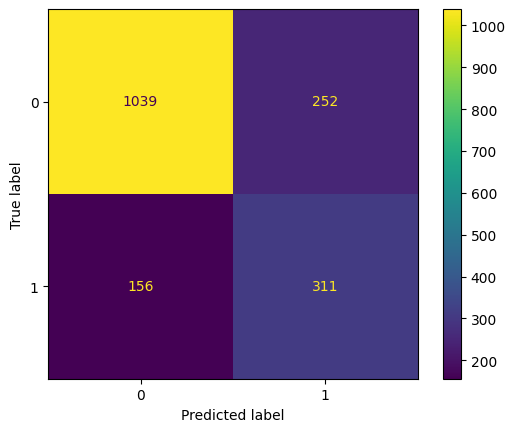

In [ ]:
best_modelo.fit(X_train_res, y_train_res)
y_pred = best_modelo.predict(X_test)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
resumen(y_test, y_pred)

### Resumen

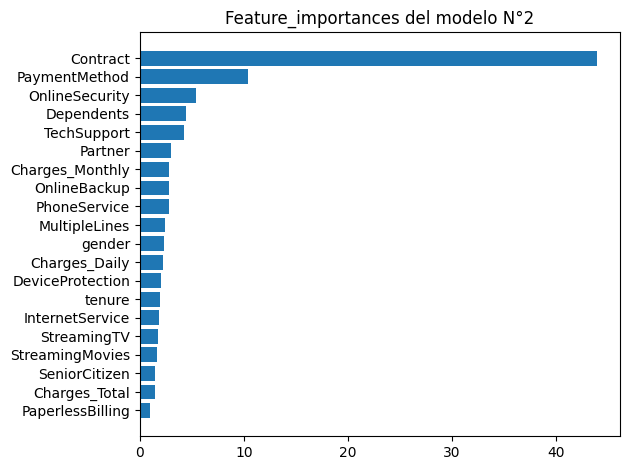

In [ ]:
visualizacion(f2,2)

## RandomForest con oversampling

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100,max_depth=3, random_state=42)

cv = cross_validate(RF, X_train_res, y_train_res, scoring='recall', cv=5, return_train_score=True)
pd.DataFrame(cv).mean().round(2)

,0
fit_time,0.42
score_time,0.03
test_score,0.86
train_score,0.87


### Evaluación Final

              precision    recall  f1-score   support

           0       0.91      0.72      0.81      1291
           1       0.51      0.80      0.62       467

    accuracy                           0.74      1758
   macro avg       0.71      0.76      0.71      1758
weighted avg       0.80      0.74      0.76      1758

Precision     : 0.51
Recall        : 0.80
F1-Score      : 0.62
Roc-auc       : 0.76


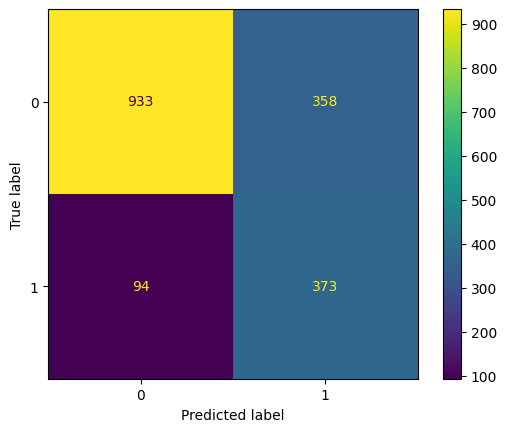

In [ ]:
RF.fit(X_train_res,y_train_res)
y_pred = RF.predict(X_test)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
resumen(y_test, y_pred)

### Comprendiendo los feature_importances_

In [ ]:
f3 = pd.DataFrame({'Features': X.columns, 'Valores': (RF.feature_importances_*100)}).sort_values(by='Valores', ascending=False)
f3

,Features,Valores
14,Contract,30.061053
16,PaymentMethod,14.283136
4,tenure,8.175217
11,TechSupport,7.437938
8,OnlineSecurity,7.258276
19,Charges_Daily,6.691757
17,Charges_Monthly,6.483842
3,Dependents,5.290311
2,Partner,4.904248
7,InternetService,4.368918


### Resumen

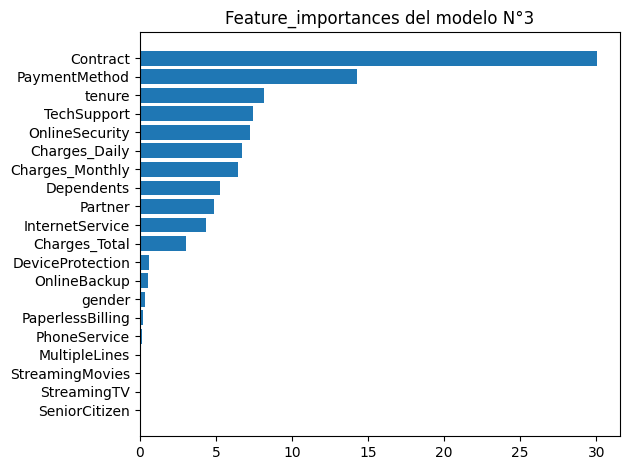

In [ ]:
visualizacion(f3,3)

# RandomForest sin oversampling

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True, stratify=y)

RF = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42, class_weight='balanced')

cv = cross_validate(RF, X_train, y_train, scoring='recall', cv=5, return_train_score=True)
pd.DataFrame(cv).mean().round(2)

,0
fit_time,0.51
score_time,0.03
test_score,0.80
train_score,0.83


## Evaluación final

              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1291
           1       0.50      0.81      0.62       467

    accuracy                           0.74      1758
   macro avg       0.71      0.76      0.71      1758
weighted avg       0.80      0.74      0.75      1758

Precision     : 0.50
Recall        : 0.81
F1-Score      : 0.62
Roc-auc       : 0.76


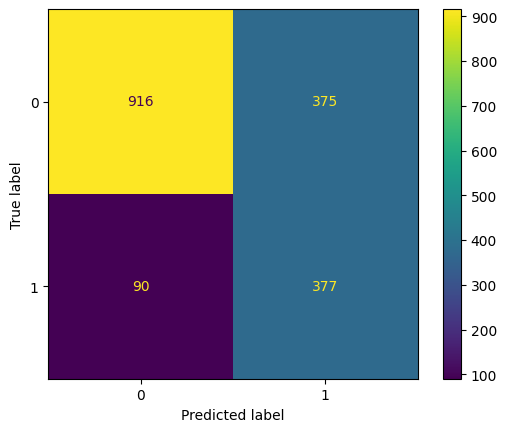

In [ ]:
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
resumen(y_test, y_pred)

## Comprendiendo los feature_importances_

In [ ]:
f4 = pd.DataFrame({'Features': X.columns, 'Valores': (RF.feature_importances_*100)}).sort_values(by='Valores', ascending=False)
f4

,Features,Valores
14,Contract,28.406983
4,tenure,16.070014
17,Charges_Monthly,10.602563
18,Charges_Total,10.391016
19,Charges_Daily,8.111062
7,InternetService,7.652477
11,TechSupport,3.939390
8,OnlineSecurity,3.766445
16,PaymentMethod,3.675196
15,PaperlessBilling,2.280699


## Resumen

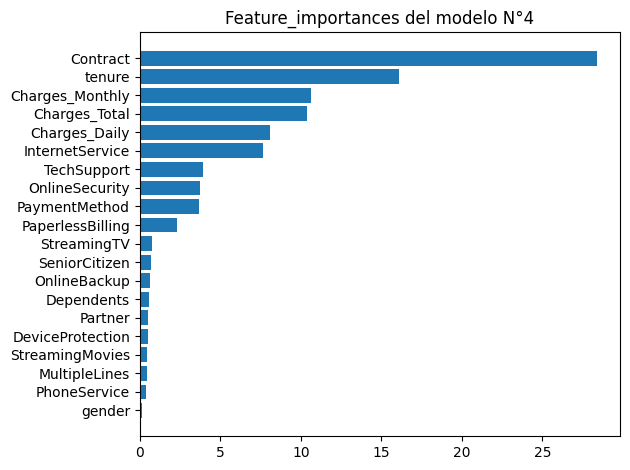

In [ ]:
visualizacion(f4,4)

# Cierre

# Informe de Análisis de Cancelación de Clientes y Estrategias de Retención

---

## Resumen Ejecutivo

Este informe presenta un análisis detallado sobre la cancelación de clientes (*churn*) utilizando modelos de Machine Learning. Se evaluaron diversas técnicas para manejar el desbalance de clases y se identificaron los factores más relevantes que influyen en la decisión de cancelar el servicio. Con base en estos hallazgos, se proponen estrategias prácticas para mejorar la retención de clientes y reducir la tasa de cancelación.

El análisis comparativo entre modelos muestra que diferentes enfoques tienen ventajas según el objetivo: maximizar la detección de clientes en riesgo o equilibrar precisión y recall. Finalmente, se ofrecen recomendaciones alineadas con los resultados para guiar acciones comerciales efectivas.

---

# 📊 Informe de Análisis de Cancelación de Clientes y Estrategias de Retención

---

## 1. 🎯 Objetivo del Proyecto

El objetivo principal es predecir qué clientes tienen mayor probabilidad de cancelar el servicio (*churn*) utilizando modelos de Machine Learning. A partir de los resultados, se busca identificar las variables más influyentes en la cancelación y proponer estrategias de retención efectivas.

---

## 2. 🗂️ Descripción General del Conjunto de Datos

- **Tamaño del conjunto de datos:** 7032 registros  
- **Proporción de cancelación (Churn):**  
  - Clientes que cancelaron: **26.57%**  
  - Clientes activos: **73.42%**

> ⚠️ **Nota**: Se identificó un fuerte desbalance de clases en la variable objetivo.  
> Para mitigar sus efectos en el rendimiento de los modelos, se aplicaron las siguientes técnicas:
>
> - ⚖️ **Ajuste de pesos de clase** (`scale_pos_weight` en XGBoost, `class_weight` en Random Forest)
> - 🔁 **Sobremuestreo con SMOTE** (generación sintética de muestras minoritarias)

---

## 3. 🤖 Modelos Evaluados

| Modelo                   | Descripción técnica                                                                 |
|--------------------------|--------------------------------------------------------------------------------------|
| **XGBoost**              | Modelo de *gradient boosting* sin modificación de datos; se ajusta `scale_pos_weight` para compensar el desequilibrio de clases. |
| **XGBoost + SMOTE**      | Se aplica SMOTE para generar muestras sintéticas de la clase minoritaria antes de entrenar el modelo. |
| **Random Forest + SMOTE**| SMOTE se aplica al conjunto de entrenamiento para equilibrar las clases antes de entrenar un Random Forest. |
| **Random Forest**        | Modelo entrenado sin SMOTE; se usa `class_weight='balanced'` para ajustar automáticamente los pesos según la frecuencia de clases. |

---

### 📌 Comparación de Técnicas de Balanceo

| Técnica                        | ✅ Ventajas                                                                 | ⚠️ Riesgos                                                                |
|-------------------------------|-----------------------------------------------------------------------------|---------------------------------------------------------------------------|
| `class_weight='balanced'`     | Fácil implementación; no requiere modificar el dataset                     | Puede ser insuficiente con una clase muy escasa                          |
| **SMOTE**                     | Genera muestras adicionales de la clase minoritaria                        | Puede introducir ruido o *overfitting* si no se valida bien              |
| **XGBoost (`scale_pos_weight`)** | Eficiente y robusto ante desbalance; ajusta internamente los pesos        | Requiere calibración precisa según el ratio de clases                    |

---

### 🧮 Datos de entrada por modelo

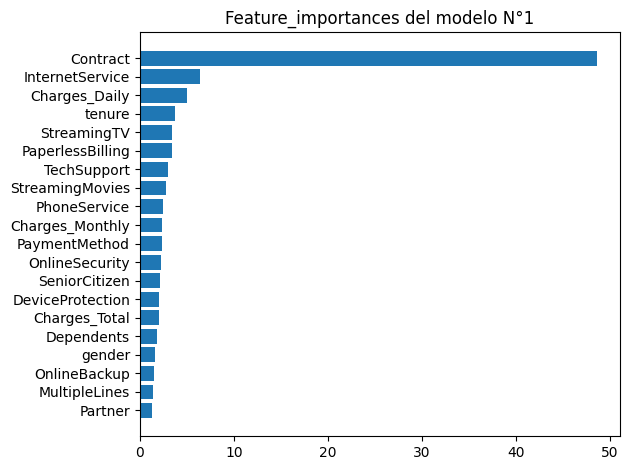

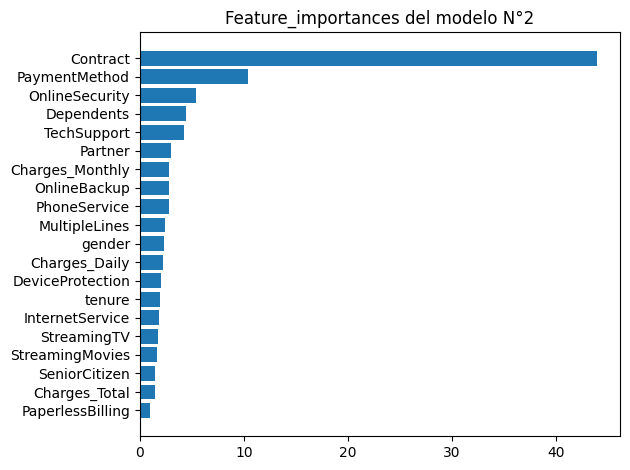

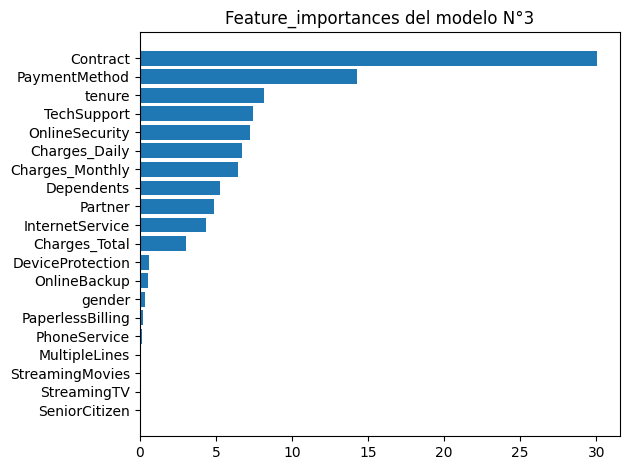

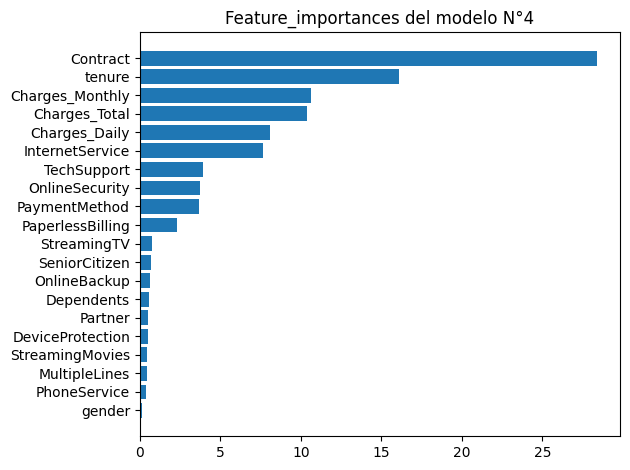

---

## 4. 🔍 Principales Factores que Influyen en la Cancelación

Tras analizar la importancia de las variables en los modelos evaluados, se identifican patrones comunes:

| Variable                          | 📈 Presencia en modelos             | 💬 Comentario                                                                  |
|----------------------------------|-------------------------------------|---------------------------------------------------------------------------------|
| **Contract**                     | 🟩 (Top 1 en todos)                  | Tipo de contrato es el factor más determinante.                                |
| **tenure**                       | 🟩 (Top 5 en 3 modelos)              | Clientes con menor antigüedad tienen mayor probabilidad de cancelar.           |
| **Charges (Monthly/Daily/Total)**| 🟩 (Importante en todos)             | Cargos altos pueden impactar negativamente la permanencia.                     |
| **PaymentMethod**                | 🟨 (Modelos 2 y 3)                   | Ciertos métodos de pago se asocian a mayor tasa de cancelación.                |
| **TechSupport**                  | 🟨 (Modelos 1, 2, 3, 4)              | La falta de soporte técnico se relaciona con mayor churn.                      |
| **OnlineSecurity**               | 🟨 (Relevante en 3 modelos)          | Servicios de seguridad contribuyen a la retención.                             |
| **Dependents / Partner**         | 🟨 (Moderadamente útiles)            | Factores útiles para personalizar estrategias de segmentación.                 |

---

## 5. 🛡️ Estrategias de Retención Basadas en los Resultados

### 1. Incentivar contratos a largo plazo (`Contract`)
- **Justificación:** Clientes con contrato mensual tienen mayor tasa de cancelación.
- **Acción:** Ofrecer promociones o beneficios exclusivos para contratos anuales o bianuales.

---

### 2. Fidelizar en los primeros meses (`tenure`)
- **Justificación:** La mayoría de cancelaciones ocurre en los primeros meses.
- **Acción:** Implementar campañas de bienvenida, seguimiento, bonos o llamadas proactivas durante los primeros 6 meses.

---

### 3. Ajustar percepción de valor (`Charges_Monthly`, `Charges_Daily`, `Charges_Total`)
- **Justificación:** Cargos altos están correlacionados con cancelaciones.
- **Acción:**
  - Sugerir planes más ajustados al uso.
  - Implementar alertas ante subidas bruscas de consumo.
  - Ofrecer personalización de tarifas.

---

### 4. Promover pagos automáticos (`PaymentMethod`)
- **Justificación:** Pagos manuales o con cheque tienen mayor churn.
- **Acción:** Ofrecer incentivos por uso de débito automático o simplificar la suscripción a métodos digitales.

---

### 5. Incluir soporte técnico (`TechSupport`)
- **Justificación:** Clientes sin soporte técnico cancelan más.
- **Acción:** Incluir `TechSupport` gratuito durante los primeros meses o como bono por fidelización.

---

### 6. Añadir servicios de seguridad digital (`OnlineSecurity`)
- **Justificación:** Aumenta la percepción de valor y disminuye el churn.
- **Acción:** Ofrecer pruebas gratuitas o incluir servicios básicos de seguridad en todos los planes.

---

### 7. Segmentar según perfil (`Partner`, `Dependents`, `SeniorCitizen`)
- **Justificación:** Datos demográficos permiten personalizar estrategias.
- **Acción:**
  - Ofrecer planes familiares para quienes tienen dependientes.
  - Diseñar campañas para adultos mayores, enfocadas en simplicidad y valor.

---

## 6. 📊 Evaluación de Resultados

| Modelo                   | 🧠 Precision | 🎯 Recall | 🔁 F1-Score | 📈 ROC-AUC |
|--------------------------|--------------|-----------|--------------|-------------|
| Modelo 1 (XGBoost)       | 0.53         | 0.77      | 0.63         | 0.76        |
| Modelo 2 (XGBoost + SMOTE) | 0.55       | 0.67      | 0.60         | 0.74        |
| Modelo 3 (RF + SMOTE)    | 0.51         | 0.80      | 0.62         | 0.76        |
| Modelo 4 (RF balanceado) | 0.50         | 0.81      | 0.62         | 0.76        |

---

## 7. 🧾 Conclusiones

- ✅ **Modelos Random Forest (3 y 4)** lograron el mejor recall (≥ 0.80), ideales si se busca **maximizar la detección de cancelaciones**.
- ⚖️ **XGBoost sin SMOTE (Modelo 1)** obtuvo el mejor F1-Score (0.63), siendo el más equilibrado entre precisión y sensibilidad.
- 🎯 **XGBoost + SMOTE (Modelo 2)** alcanzó la mayor precisión (0.55), útil si se desea **minimizar falsos positivos**.
- 📉 **ROC-AUC fue consistente** (0.74–0.76), lo que indica un desempeño similar en discriminación para todos los modelos.

> 📌 **Recomendación:** Si el objetivo es reducir cancelaciones de forma proactiva, se sugiere usar **Random Forest con SMOTE o `class_weight='balanced'`**.  
> Si se desea un modelo más equilibrado en precisión y recall, **XGBoost sin SMOTE** representa una excelente alternativa.

---